# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Ski data](#3.4.1_Ski_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 Total state area](#3.5.1.1_Total_state_area)
      * [3.5.1.2 Total state population](#3.5.1.2_Total_state_population)
      * [3.5.1.3 Resorts per state](#3.5.1.3_Resorts_per_state)
      * [3.5.1.4 Total skiable area](#3.5.1.4_Total_skiable_area)
      * [3.5.1.5 Total night skiing area](#3.5.1.5_Total_night_skiing_area)
      * [3.5.1.6 Total days open](#3.5.1.6_Total_days_open)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

We have data scraped from [fragrantica](https://www.fragrantica.com/) website which will help us determine the gender to market a new perfume to.

The most important factor of a perfume are the _notes_ that make it up. We will feed a set of notes to our model and will be informed if the perfume will suit

- female
- male
- unisex

The data has been cleaned up.  We would like to do some initial exploration to understand how perfumes are recived across the gender spectrum.

## 3.3 Imports<a id='3.3_Imports'></a>

In [389]:
import pandas as pd
import numpy as np
import missingno as msno
import re 
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import zscore


## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [390]:
perfume_data = pd.read_csv('../data/interim/perfume_labeled.csv')
df = perfume_data.copy()

In [391]:
df.shape

(47648, 24)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47648 entries, 0 to 47647
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     47648 non-null  object
 1   notes_1   45423 non-null  object
 2   notes_2   43904 non-null  object
 3   notes_3   41121 non-null  object
 4   notes_4   38242 non-null  object
 5   notes_5   34902 non-null  object
 6   notes_6   31168 non-null  object
 7   notes_7   27265 non-null  object
 8   notes_8   22753 non-null  object
 9   notes_9   16563 non-null  object
 10  notes_10  12322 non-null  object
 11  notes_11  9188 non-null   object
 12  notes_12  6678 non-null   object
 13  notes_13  5000 non-null   object
 14  notes_14  3756 non-null   object
 15  notes_15  2899 non-null   object
 16  notes_16  2242 non-null   object
 17  notes_17  1712 non-null   object
 18  notes_18  1312 non-null   object
 19  notes_19  992 non-null    object
 20  notes_20  763 non-null    object
 21  label     47

In [393]:
df.head()

,title,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,...,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,label,notes,gender
0,Aamal The Spirit of Dubai for women and men,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,...,Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,men,"Bulgarian Rose,Bergamot,Fruits,Agarwood Oud,Sa...",unisex
1,Aatifa Ajmal for women and men,Top1Rose,Top2Cumin,Middle0Amber,NaN,Base0Musk,Base1Amber,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women,"Rose,Cumin,Amber,Musk,Amber",unisex
2,AA Al-Jazeera Perfumes for women and men,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Rose,Sandalwood,Apple,Agarwood Oud",unisex
3,aarewasser Art of Scent - Swiss Perfumes for w...,Top1Green Tea,Top2White Flowers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Green Tea,White Flowers",unisex
4,Aaliyah Hamidi Oud & Perfumes for women and men,Top1Amber,Top2Sandalwood,NaN,Top4Vetiver,Top5Saffron,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Amber,Sandalwood,Vetiver,Saffron",unisex


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Perfume usage Gender-wise<a id='3.5.1_gender_wise'></a>

What is the percentage of perfumes in the market under each gender?

We have two gender related information with us.
- The gender marketed by the manufacturers
- The gender voted by customers

How much does it differ?

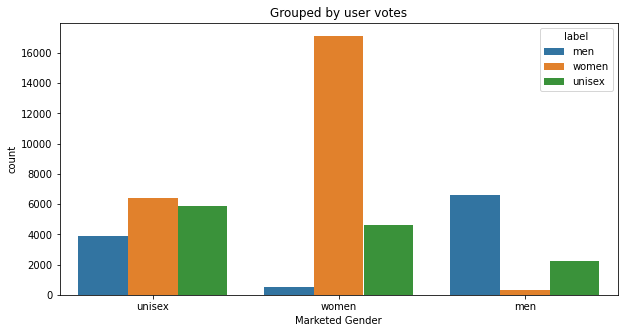

In [394]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.gender, hue=df['label'])
plt.title('Grouped by user votes')  
plt.xlabel('Marketed Gender')
plt.show();

There are more perfumes available in the *women* segment than all other segments. Even perfumes that are marketed as *unisex* are generally voted as more suited to *women* than *men*. Perfumes marked as _women_ have a good percentage marked as _unisex_. Even within _men's_ perfumes, a small percentage have been voted on as sutiable for unisex.

In [395]:
# Check out the percentage values
print("Number of perfumes marketed for women:", len(df[df.gender == 'women']))
print("Breakup of perfumes marketed for women:")
print(df[df.gender == 'women']['label'].value_counts())
print("\n")

print("Number of perfumes marketed for men:", len(df[df.gender == 'men']))
print("Breakup of perfumes marketed for men:")
print(df[df.gender == 'men']['label'].value_counts())
print("\n")

print("Number of perfumes marketed for unisex:", len(df[df.gender == 'unisex']))
print("Breakup of perfumes marketed for unisex:")
print(df[df.gender == 'unisex']['label'].value_counts())
print("\n")

Number of perfumes marketed for women: 22274
Breakup of perfumes marketed for women:
women     17133
unisex     4600
men         541
Name: label, dtype: int64


Number of perfumes marketed for men: 9149
Breakup of perfumes marketed for men:
men       6621
unisex    2228
women      300
Name: label, dtype: int64


Number of perfumes marketed for unisex: 16225
Breakup of perfumes marketed for unisex:
women     6411
unisex    5897
men       3917
Name: label, dtype: int64




### 3.5.2 Popular Notes in Perfumes<a id='3.5.2_Perfume_Notes'></a>

#### 3.5.2.1 Pick out top 100 notes in perfumes<a id='3.5.2.1_Top_100'></a>

A perfume is made up of distinct notes/smells. Let's see collect all the distinct *notes* in our dataset.

In [345]:
#look for all disitnct notes in our dataset
notes_set = {note for row in df['notes'].astype(str) for note in row.split(',')}
len(notes_set)

1451

We have **1452** unique notes in our dataset. Let's get a count of each of these notes.

In [396]:
cols_to_review = ['notes_1', 'notes_2', 'notes_3', 'notes_4', 'notes_5', 'notes_6', 'notes_7', 'notes_8', 'notes_9', 'notes_10', 
                  'notes_11', 'notes_12', 'notes_13', 'notes_14', 'notes_15', 'notes_16', 'notes_17', 'notes_18', 'notes_19', 'notes_20']

note_count = pd.Series()

for col in cols_to_review:
    note_count = note_count.append(df[col].value_counts())
    
all_notes = pd.DataFrame({'count':note_count})
all_notes.reset_index(inplace=True)
all_notes.rename(columns = {'index':'note'}, inplace = True)
all_notes

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,note,count
0,Top1Bergamot,3236
1,Top1Mandarin Orange,2282
2,Top1Lemon,1651
3,Top1Grapefruit,1301
4,Top1Orange,976
...,...,...
33241,Base4Myrrh,1
33242,Base6iris,1
33243,Base5Castoreum,1
33244,Base7Cinnamon,1


Strip out the header info so that we just get the note name.

In [397]:
all_notes['note'] = all_notes.note.map(lambda x: re.sub(r'Top|Middle|Base|\d|\(|\)', '', x), na_action='ignore')

In [398]:
all_notes = all_notes.groupby(by='note').sum().reset_index()

In [399]:
all_notes.shape

(1440, 2)

In [403]:
all_notes = all_notes.sort_values(by='count', ascending = False).reset_index(drop=True)

Let's pick the top 100 notes from this list.

In [404]:
all_notes.head(10)

,note,count
0,Musk,18899
1,Sandalwood,13839
2,Jasmine,13535
3,Amber,13372
4,Patchouli,11772
5,Rose,11031
6,Vanilla,10690
7,Cedar,9266
8,Bergamot,7092
9,Vetiver,6307


Let's only conisder those notes that are used in at least 100 perfumes or more.

In [405]:
all_notes.drop(all_notes[all_notes['count'] < 100].index, inplace=True)
all_notes.shape

(299, 2)

So we have **299** distinct notes repeatedly showing up in perfumes.

Let's visualize top 25.

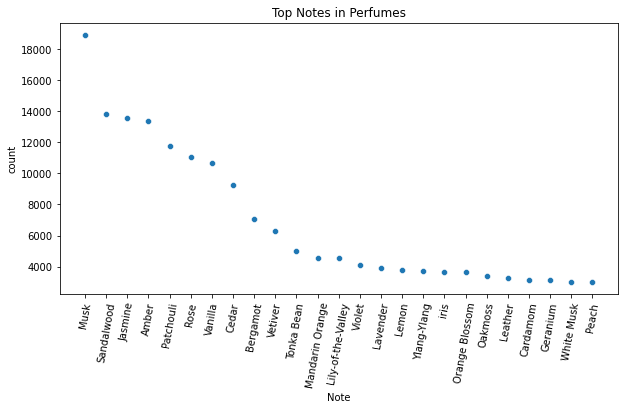

In [406]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=all_notes.head(25), x='note', y='count')
plt.title('Top Notes in Perfumes')  
plt.xticks(rotation=80)
plt.xlabel('Note')
plt.show();

In [407]:
print(all_notes.note.sort_values().tolist())
# topmost_notes = topmost_notes.sort_values(by='note', ascending = False)
# topmost_notes

['African Orange flower', 'Agarwood Oud', 'Aldehydes', 'Almond', 'Almond Blossom', 'Amalfi Lemon', 'Amber', 'Ambergris', 'Amberwood', 'Ambrette Musk Mallow', 'Ambroxan', 'Amyris', 'Angelica', 'Anise', 'Apple', 'Apple Blossom', 'Apricot', 'Artemisia', 'Atlas Cedar', 'Australian Sandalwood', 'Balsam Fir', 'Bamboo', 'Basil', 'Bay Leaf', 'Beeswax', 'Benzoin', 'Bergamot', 'Big Strawberry', 'Birch', 'Bitter Almond', 'Bitter Orange', 'Black Currant', 'Black Pepper', 'Black Tea', 'Blackberry', 'Blood Orange', 'Blueberry', 'Bourbon Vanilla', 'Brazilian Rosewood', 'Bulgarian Rose', 'Cacao', 'Cacao Pod', 'Calabrian bergamot', 'Caramel', 'Caraway', 'Cardamom', 'Carnation', 'Carrot Seeds', 'Cashmeran', 'Cashmere Wood', 'Cassia', 'Cassis', 'Castoreum', 'Cedar', 'Chamomile', 'Champaca', 'Cherry', 'Cherry Blossom', 'Chocolate', 'Cinnamon', 'Citron', 'Citruses', 'Civet', 'Clary Sage', 'Clementine', 'Clove', 'Clover', 'Cloves', 'Coconut', 'Coconut Milk', 'Coffee', 'Cognac', 'Coriander', 'Cotton Candy', 

In [409]:
all_notes.loc[all_notes.note.str.contains('Orange')]

,note,count
11,Mandarin Orange,4539
18,Orange Blossom,3640
36,Orange,2199
110,African Orange flower,591
111,Bitter Orange,590
191,Blood Orange,246
238,Sweet Orange,166


In [334]:
all_notes.head(10)

,note,count
0,Musk,18899
1,Sandalwood,13839
2,Jasmine,13536
3,Amber,13372
4,Patchouli,11772
5,Rose,11032
6,Vanilla,10691
7,Cedar,9266
8,Bergamot,7093
9,Vetiver,6307


**Musk** is the clear favourite, appearing in 18000+ perfumes. The top 10 notes appear in around 5000 perfumes or more.

#### 3.5.2.2 Visualize top 5 Notes by gender<a id='3.5.2.2_Top_5_gender'></a>

Let's visualize how **musk** is present in perfumes groubed by gender.

In [410]:
def get_count(label_count):
    
    labels = label_count.index.tolist()
    count = {}
    
    if 'women' in labels:
        count['women'] = label_count['women']
    else:
        count['women'] = 0
        
    if 'men' in labels:
        count['men'] = label_count['men']
    else:
        count['men'] = 0
    
    if 'unisex' in labels:
        count['unisex'] = label_count['unisex']
    else:
        count['unisex'] = 0
        
    return count

In [421]:
df['notes_list'] = df.notes.str.split(',')

In [433]:
df[df.notes_list.map(lambda x: True if 'Sandalwood' in x else False)]

,title,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,...,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,label,notes,gender,notes_list
0,Aamal The Spirit of Dubai for women and men,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,...,NaN,NaN,NaN,NaN,NaN,NaN,men,"Bulgarian Rose,Bergamot,Fruits,Agarwood Oud,Sa...",unisex,"[Bulgarian Rose, Bergamot, Fruits, Agarwood Ou..."
2,AA Al-Jazeera Perfumes for women and men,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Rose,Sandalwood,Apple,Agarwood Oud",unisex,"[Rose, Sandalwood, Apple, Agarwood Oud]"
4,Aaliyah Hamidi Oud & Perfumes for women and men,Top1Amber,Top2Sandalwood,NaN,Top4Vetiver,Top5Saffron,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Amber,Sandalwood,Vetiver,Saffron",unisex,"[Amber, Sandalwood, Vetiver, Saffron]"
5,Aaliyah Xyrena for women and men,Top1Lavender,Top2Mint,Middle0Violet,Middle1Leather,Middle2Black Pepper,Base0Sandalwood,Base1Jasmine,Base2Amber,Base3Vanilla,...,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Lavender,Mint,Violet,Leather,Black Pepper,Sand...",unisex,"[Lavender, Mint, Violet, Leather, Black Pepper..."
8,Targa Blackbird for women and men,Top1Citruses,Top2Green Pepper,Top3Olibanum,Top4Opoponax,Top5Geranium,Top6Caraway,Middle0Black Pepper,Middle1Olibanum,Middle2Choya Loban,...,Base2Incense,Base3Guaiac Wood,Base4Teak Wood,Base5Cedar,Base6Oak,Base7Vetiver,unisex,"Citruses,Green Pepper,Olibanum,Opoponax,Gerani...",unisex,"[Citruses, Green Pepper, Olibanum, Opoponax, G..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47633,Rose de Rose Rance 1795 for women,Middle0Jasmine,Middle1Ylang-Ylang,Middle2Tuberose,Base0Sandalwood,Base1Vanille,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,women,"Jasmine,Ylang-Ylang,Tuberose,Sandalwood,Vanille",women,"[Jasmine, Ylang-Ylang, Tuberose, Sandalwood, V..."
47634,Tendre Reverence Princesse Marina De Bourbon f...,Top1Red Currant,Top2Peach,Middle0Pink Peony,Middle1Magnolia,Middle2Violet,Base0Musk,Base1Sandalwood,Base2Vanilla,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,women,"Red Currant,Peach,Pink Peony,Magnolia,Violet,M...",women,"[Red Currant, Peach, Pink Peony, Magnolia, Vio..."
47635,Seta Moresque for women and men,Top1Lemon,Top2Saffron,Middle0Ylang-Ylang,Middle1Myrrh,Base0Vanilla,Base1Benzoin,Base2Amber,Base3Sandalwood,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,women,"Lemon,Saffron,Ylang-Ylang,Myrrh,Vanilla,Benzoi...",unisex,"[Lemon, Saffron, Ylang-Ylang, Myrrh, Vanilla, ..."
47643,Oud Extravagant Maitre Parfumeur et Gantier fo...,Top1Lavender,Top2Coriander,Middle0Agarwood (Oud),Middle1Myrrh,Middle2Labdanum,Middle3Incense,Base0Patchouli,Base1Sandalwood,Base2Vanilla,...,NaN,NaN,NaN,NaN,NaN,NaN,men,"Lavender,Coriander,Agarwood Oud,Myrrh,Labdanum...",unisex,"[Lavender, Coriander, Agarwood Oud, Myrrh, Lab..."


In [336]:
women_count= []
men_count= []
unisex_count= []

for note in all_notes.note:
    label_count = get_count(df.loc[note in df.notes.str.split(','), 'label'].value_counts())
    women_count.append(label_count['women'])
    men_count.append(label_count['men'])
    unisex_count.append(label_count['unisex'])

label_df = pd.DataFrame({'women': women_count, 'men': men_count, 'unisex': unisex_count})

all_notes = pd.concat([all_notes, label_df], axis=1)

all_notes


#     plt.figure(figsize=(10,5))
#     sns.countplot(x=subset_df.gender, hue=subset_df['label'])
#     plt.title('Perfumes with '+ note + ' grouped by gender')  
#     plt.xlabel('Marketed Gender')
#     plt.show();

,note,count,women,men,unisex
0,Musk,18899,11861,4701,5850
1,Sandalwood,13839,7176,3340,3471
2,Jasmine,13536,8908,2207,3760
3,Amber,13372,7010,4340,4053
4,Patchouli,11772,4974,3711,3329
...,...,...,...,...,...
297,Clover,101,62,17,30
298,Tomato Leaf,101,43,31,27
299,Fennel,101,43,24,34
300,Red Rose,100,78,16,29


In [337]:
df.loc[df.notes.str.contains('Rice')]

,title,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,...,notes_17,notes_18,notes_19,notes_20,label,notes,top_notes,middle_notes,base_notes,gender
523,Coconut Sugar Note Fragrances for women,Top1Kiwi,Top2Peach,Middle0Coconut Milk,Middle1Rice Basmati,Middle2Freesia,Base0White Musk,Base1vanilla bean,NaN,NaN,...,NaN,NaN,NaN,NaN,women,"Top1Kiwi,Top2Peach,Middle0Coconut Milk,Middle1...","Kiwi,Peach","Coconut Milk,Rice Basmati,Freesia","White Musk,vanilla bean",women
1315,Eaudemoiselle de Givenchy Absolu d’Oranger Giv...,Top1Jasmine,Top2Rose,NaN,Middle1Incense,Middle2Rice,Base0Vanilla,Base1Tonka Bean,NaN,NaN,...,NaN,NaN,NaN,NaN,women,"Top1Jasmine,Top2Rose,nan,Middle1Incense,Middle...","Jasmine,Rose","Incense,Rice","Vanilla,Tonka Bean",women
1682,Sugar Sugar No. 52 Tokyo Milk Parfumerie Curio...,Top1Rice Basmati,Top2Coconut Milk,Top3Vanilla Absolute,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,women,"Top1Rice Basmati,Top2Coconut Milk,Top3Vanilla ...","Rice Basmati,Coconut Milk,Vanilla Absolute",NaN,NaN,women
2343,odo-res 73 Acqua Novara for women and men,Top1Tomato Leaf,Top2Cassis,Top3Red Apple,Middle0Jasmine,Middle1Saffron,Middle2Incense,Middle3Basil,Middle4Rice,Base0Musk,...,NaN,NaN,NaN,NaN,men,"Top1Tomato Leaf,Top2Cassis,Top3Red Apple,Middl...","Tomato Leaf,Cassis,Red Apple","Jasmine,Saffron,Incense,Basil,Rice","Musk,Amber",unisex
2346,Coeur De Rose Acorelle for women,Top1Violet,Top2Rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,women,"Top1Violet,Top2Rice,nan,nan,nan,nan,nan,nan,na...","Violet,Rice",NaN,NaN,women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,Tsiling Raymond Matts for women and men,Top1Pear,NaN,NaN,Middle0iris,Middle1Honeysuckle,Base0Milk,Base1Rice,Base2Patchouli,NaN,...,NaN,NaN,NaN,NaN,women,"Top1Pear,nan,nan,Middle0iris,Middle1Honeysuckl...",Pear,"iris,Honeysuckle","Milk,Rice,Patchouli",unisex
46517,Yawahada (Soft Skin) J-Scent for women and men,NaN,Top2Milk,Middle0Rice,Middle1Rose,Middle2Jasmine,Base0Sandalwood,Base1Amber,NaN,NaN,...,NaN,NaN,NaN,NaN,unisex,"nan,Top2Milk,Middle0Rice,Middle1Rose,Middle2Ja...",Milk,"Rice,Rose,Jasmine","Sandalwood,Amber",unisex
46807,Mumbai Mod.2 Parfum Bar for women,Middle0Tea,Middle1Incense,Base0Rice,Base1Vanilla,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,unisex,"Middle0Tea,Middle1Incense,Base0Rice,Base1Vanil...",NaN,"Tea,Incense","Rice,Vanilla",women
47493,No. 6 Aromatologic for women and men,Top1Musk,Top2Rose,Top3Rice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,women,"Top1Musk,Top2Rose,Top3Rice,nan,nan,nan,nan,nan...","Musk,Rose,Rice",NaN,NaN,unisex


As the number of perfumes marketed for women are more

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

You can offer some justification for treating all states equally, and work towards building a pricing model that considers all states together, without treating any one particularly specially. You haven't seen any clear grouping yet, but you have captured potentially relevant state data in features most likely to be relevant to your business use case. This answers a big question!

### 3.5.5 Ski Resort Numeric Data<a id='3.5.5_Ski_Resort_Numeric_Data'></a>

#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

Having previously spent some time exploring the state summary data you derived, you now start to explore the resort-level data in more detail. This can help guide you on how (or whether) to use the state labels in the data. It's now time to merge the two datasets and engineer some intuitive features. For example, you can engineer a resort's share of the supply for a given state.

In [54]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,3,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,2,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,21,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,22,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,5,256.0,0.140242,90.203861


In [55]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


Having merged your state summary features into the ski resort data, add "state resort competition" features:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area

Once you've derived these features to put each resort within the context of its state,drop those state columns. Their main purpose was to understand what share of states' skiing "assets" is accounted for by each resort.

In [56]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

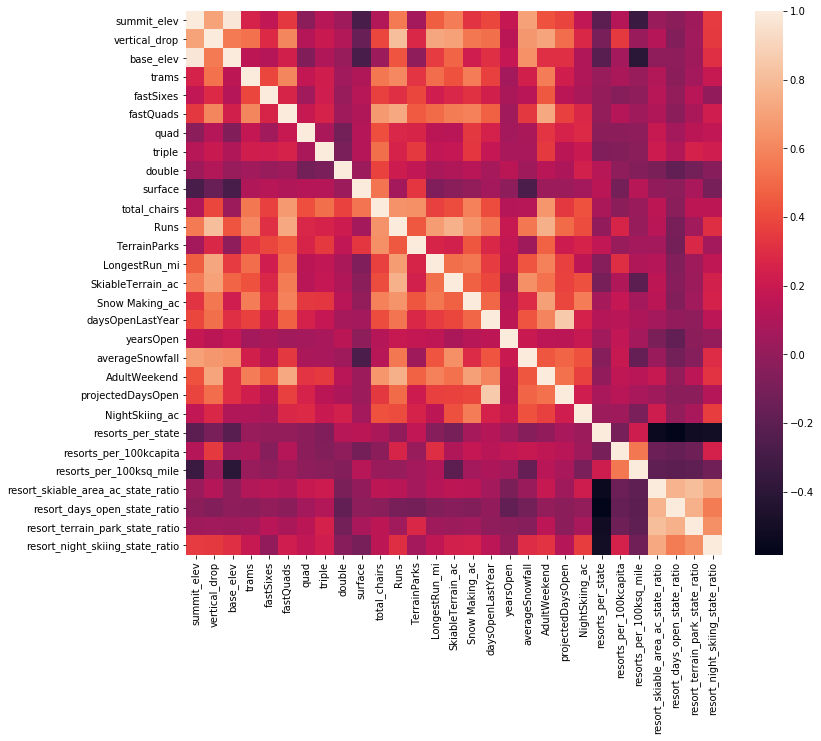

In [57]:
#Code task 12#
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.corr());

There is a lot to take away from this. First, summit and base elevation are quite highly correlated. This isn't a surprise. You can also see that you've introduced a lot of multicollinearity with your new ratio features; they are negatively correlated with the number of resorts in each state. This latter observation makes sense! If you increase the number of resorts in a state, the share of all the other state features will drop for each. An interesting observation in this region of the heatmap is that there is some positive correlation between the ratio of night skiing area with the number of resorts per capita. In other words, it seems that when resorts are more densely located with population, more night skiing is provided.

Turning your attention to your target feature, `AdultWeekend` ticket price, you see quite a few reasonable correlations. `fastQuads` stands out, along with `Runs` and `Snow Making_ac`. The last one is interesting. Visitors would seem to value more guaranteed snow, which would cost in terms of snow making equipment, which would drive prices and costs up. Of the new features, `resort_night_skiing_state_ratio` seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity is positive for the price a resort can charge.

As well as `Runs`, `total_chairs` is quite well correlated with ticket price. This is plausible; the more runs you have, the more chairs you'd need to ferry people to them! Interestingly, they may count for more than the total skiable terrain area. For sure, the total skiable terrain area is not as useful as the area with snow making. People seem to put more value in guaranteed snow cover rather than more variable terrain area.

The vertical drop seems to be a selling point that raises ticket prices as well.

#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. You'll now create a series of scatterplots to really dive into how ticket price varies with other numeric features.

In [1]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [ ]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [x for x in ski_data.columns if x not in ['Name', 'Region', 'state', 'AdultWeekend']]

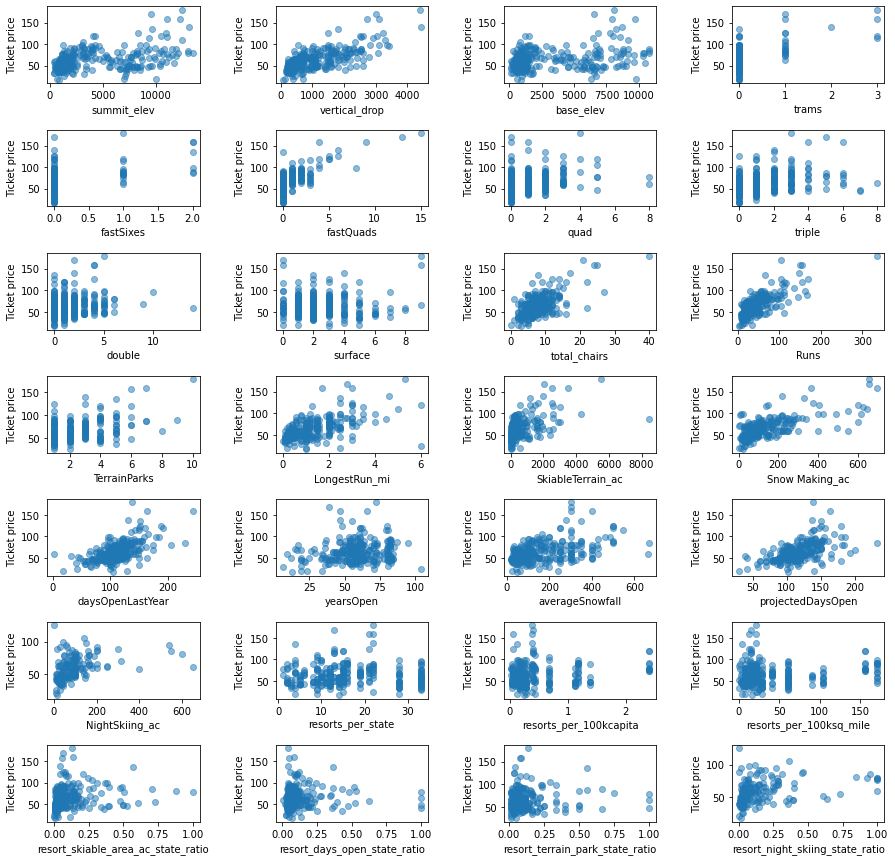

In [53]:
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs` appear quite similar and also useful. `resorts_per_100kcapita` shows something interesting that you don't see from just a headline correlation figure. When the value is low, there is quite a variability in ticket price, although it's capable of going quite high. Ticket price may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket price could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand. The lower ticket price when fewer resorts serve a population may similarly be because it's a less popular state for skiing. The high price for some resorts when resorts are rare (relative to the population size) may indicate areas where a small number of resorts can benefit from a monopoly effect. It's not a clear picture, although we have some interesting signs.

Finally, think of some further features that may be useful in that they relate to how easily a resort can transport people around. You have the numbers of various chairs, and the number of runs, but you don't have the ratio of chairs to runs. It seems logical that this ratio would inform you how easily, and so quickly, people could get to their next ski slope! Create these features now.

In [58]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

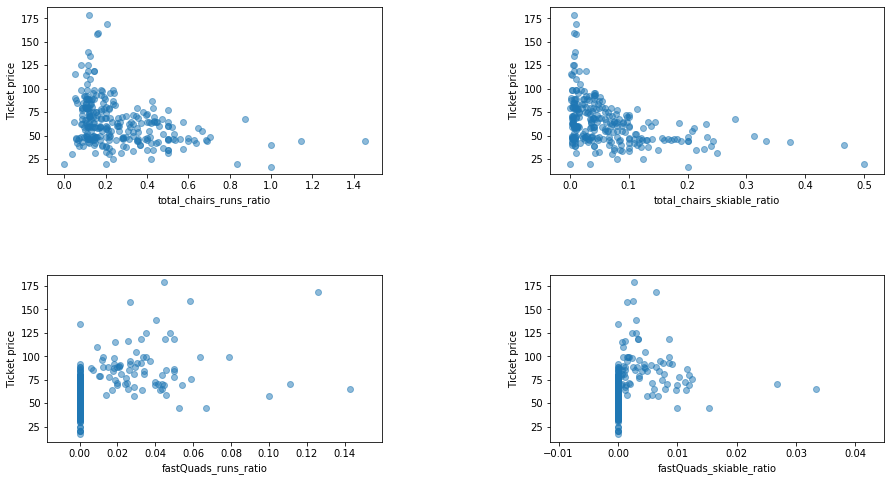

In [59]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

At first these relationships are quite counterintuitive. It seems that the more chairs a resort has to move people around, relative to the number of runs, ticket price rapidly plummets and stays low. What we may be seeing here is an exclusive vs. mass market resort effect; if you don't have so many chairs, you can charge more for your tickets, although with fewer chairs you're inevitably going to be able to serve fewer visitors. Your price per visitor is high but your number of visitors may be low. Something very useful that's missing from the data is the number of visitors per year.

It also appears that having no fast quads may limit the ticket price, but if your resort covers a wide area then getting a small number of fast quads may be beneficial to ticket price.

## 3.6 Summary<a id='3.6_Summary'></a>

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

**A: 1** At the end of the Data Wrangling step, we had two datasets.

 - Ski Resort Data
 - State wise Summary Data

After loading the data, we took a look a the the **Top States By Order Of Each Of The Summary Statistics**.

 - Top 5 States w.r.t `Total State Area`
 - Top 5 States w.r.t `Total State Population`
 - Top 5 States with `Most Resorts`
 - Top 5 States w.r.t `Total Skiable Area`
 - Top 5 States w.r.t `Total Night skiing Area`
 - Top 5 States with largest `Total Days Open`

We also took a look at `Resort Density` w.r.t. State size and State Population. There were many patterns, but it was difficult to choose between them.

So to decrease the dimeniosnality, we applied PCA to the State Summary Statistics.

`PC1` and `PC2` account for **77%** of variance in data and we tried to identify any clusterings in Ticket Price. But couldn't find any.

We went on to investigate the Correlation between Ticket Price and other variables. We pinpointed the following variables as having a positive influence in the Ticket Price

- vertical_drop
- fastQuads
- Runs
- total_chairs

So the above fields could potentially be the **Features** that will be used in this project for modelling.


In [56]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [60]:
datapath = '../data'
datapath_skidata = os.path.join(datapath, 'ski_data_step3_features.csv')
if not os.path.exists(datapath_skidata):
    ski_data.to_csv(datapath_skidata, index=False)